In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import warnings

In [2]:
import keras
import nltk
import re
import codecs

C:\Users\prash\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [35]:
# General
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# Set Plot Theme
sns.set_palette([
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
])
plt.style.use('fivethirtyeight')

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

# Modeling
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter
from gensim.models import word2vec

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [36]:
os.chdir("E:\Insofe\PH.D\PHD_ML")

In [37]:
hotels = pd.read_csv("ExistingHotels_CustomerVisitsdata-1554810038262.csv", parse_dates=[3])

In [38]:
# Removing $ Sign from Average pricing column
hotels['AveragePricing'] = hotels['AveragePricing'].str.replace('$', '').astype('int64')

In [39]:
hotels.dtypes

Hotelid                                object
userid                                 object
reviewtext                             object
Date                           datetime64[ns]
NoOfReaders                             int64
HelpfulToNoOfreaders                    int64
Value_rating                            int64
Rooms_rating                            int64
Location_rating                         int64
Cleanliness_rating                      int64
Checkin_rating                          int64
Service_rating                          int64
Businessservice_rating                  int64
AverageOverallRatingOfHotel           float64
AveragePricing                          int64
dtype: object

In [40]:
df = hotels.drop(['userid', 'reviewtext', 'Date'],axis=1)

In [41]:
ratings_vr = df.groupby(['Hotelid'])[['Value_rating']].mean().rename(columns = {'Value_rating':'Mean_value_rating'}).reset_index()


In [42]:
ratings_nr =  df.groupby(['Hotelid'])[['NoOfReaders']].mean().rename(columns = {'NoOfReaders':'Mean_No_readers'}).reset_index()


In [43]:
ratings_hnr =  df.groupby(['Hotelid'])[['HelpfulToNoOfreaders']].mean().rename(columns = {'HelpfulToNoOfreaders':'Mean_H_No_readers'}).reset_index()



In [44]:
ratings_rr =  df.groupby(['Hotelid'])[['Rooms_rating']].mean().rename(columns = {'Rooms_rating':'Mean_rooms_rating'}).reset_index()

In [45]:
ratings_lr =  df.groupby(['Hotelid'])[['Location_rating']].mean().rename(columns = {'Location_rating':'Mean_location_rating'}).reset_index()

In [46]:
ratings_cr =  df.groupby(['Hotelid'])[['Cleanliness_rating']].mean().rename(columns = {'Cleanliness_rating':'Mean_cleanliess_rating'}).reset_index()

In [47]:
ratings_chr =  df.groupby(['Hotelid'])[['Checkin_rating']].mean().rename(columns = {'Checkin_rating':'Mean_checkin_rating'}).reset_index()

In [48]:
ratings_sr =  df.groupby(['Hotelid'])[['Service_rating']].mean().rename(columns = {'Service_rating':'Mean_service_rating'}).reset_index()

In [49]:
ratings_bsr =  df.groupby(['Hotelid'])[['Businessservice_rating']].mean().rename(columns = {'Businessservice_rating':'Mean_bus_service_rating'}).reset_index()

In [50]:
ratings_avgor =  df.groupby(['Hotelid'])[['AverageOverallRatingOfHotel']].mean().rename(columns = {'AverageOverallRatingOfHotel':'Mean_avg_overall_rating'}).reset_index()

In [51]:
ratings_avgpr =  df.groupby(['Hotelid'])[['AveragePricing']].mean().rename(columns = {'AveragePricing':'Mean_avg_pricing'}).reset_index()

In [58]:
data = [ratings_rr, ratings_lr]

In [77]:
results = pd.merge(ratings_nr, ratings_hnr, ratings_vr, ratings_rr, ratings_lr, ratings_cr, ratings_chr, ratings_sr, ratings_bsr, ratings_avgor, ratings_avgpr, on='Hotelid')


TypeError: merge() got multiple values for argument 'on'

In [137]:
df_list = [ratings_vr, ratings_rr, ratings_lr, ratings_cr, ratings_chr, ratings_sr, ratings_bsr, ratings_avgor,ratings_avgpr]


In [138]:
df = df_list[0]
for df_ in df_list[1:]:
    df = df.merge(df_, on='Hotelid')

In [139]:
df.shape

(75, 10)

In [140]:
df.head(4)

,Hotelid,Mean_value_rating,Mean_rooms_rating,Mean_location_rating,Mean_cleanliess_rating,Mean_checkin_rating,Mean_service_rating,Mean_bus_service_rating,Mean_avg_overall_rating,Mean_avg_pricing
0,hotel_101,3.700000,4.075000,3.625000,4.350000,3.875000,3.750000,2.850000,3.5,245
1,hotel_102,4.453488,4.116279,3.883721,4.511628,4.011628,4.593023,2.093023,4.0,192
2,hotel_103,4.321429,4.303571,3.642857,4.232143,3.321429,4.285714,2.446429,4.0,231
3,hotel_106,4.203125,4.312500,4.140625,4.593750,4.156250,4.296875,3.093750,4.0,173


In [141]:
df.dtypes

Hotelid                     object
Mean_value_rating          float64
Mean_rooms_rating          float64
Mean_location_rating       float64
Mean_cleanliess_rating     float64
Mean_checkin_rating        float64
Mean_service_rating        float64
Mean_bus_service_rating    float64
Mean_avg_overall_rating    float64
Mean_avg_pricing             int64
dtype: object

In [142]:
avg_ratings = df

In [143]:
avg_ratings = avg_ratings.drop(['Hotelid'], axis=1)

In [144]:
# Eliminating null values
for i in avg_ratings.columns:
    avg_ratings[i] = avg_ratings[i].fillna(int(avg_ratings[i].mean()))
for i in avg_ratings.columns:
    print(avg_ratings[i].isnull().sum())

0
0
0
0
0
0
0
0
0


In [145]:
from sklearn.preprocessing import StandardScaler

# Create the scaler object with a range of 0-1

# Create the scaler object with a range of 0-1
scaler = StandardScaler()

# Fit on the training data
scaler.fit(avg_ratings)

# Transform both the training and testing data
avg_ratings1 = scaler.transform(avg_ratings)

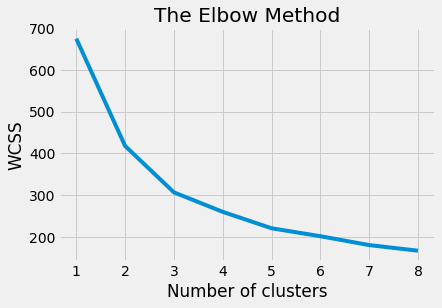

In [146]:
# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,9):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(avg_ratings1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,9),wcss)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [147]:
avg_ratings2 = pd.DataFrame(avg_ratings1)
# Applying k-means to the hotels dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(avg_ratings2)

avg_ratings2 = avg_ratings2.as_matrix(columns=None)

In [156]:
df.head(2)

,Hotelid,Mean_value_rating,Mean_rooms_rating,Mean_location_rating,Mean_cleanliess_rating,Mean_checkin_rating,Mean_service_rating,Mean_bus_service_rating,Mean_avg_overall_rating,Mean_avg_pricing
0,hotel_101,3.700000,4.075000,3.625000,4.350000,3.875000,3.750000,2.850000,3.5,245
1,hotel_102,4.453488,4.116279,3.883721,4.511628,4.011628,4.593023,2.093023,4.0,192


In [157]:
test['Hotelid'] = df['Hotelid']
test['cluster_id'] = pd.DataFrame(y_kmeans)

In [158]:
test.head(35)

,0,Hotelid,cluster_id
0,0,hotel_101,0
1,2,hotel_102,2
2,0,hotel_103,0
3,2,hotel_106,2
4,2,hotel_107,2
5,0,hotel_108,0
6,0,hotel_109,0
7,0,hotel_110,0
8,0,hotel_111,0
9,0,hotel_112,0


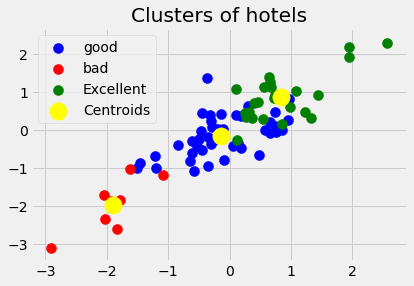

In [159]:
# Visualising the clusters
plt.scatter(avg_ratings2[y_kmeans == 0, 0], avg_ratings2[y_kmeans == 0,1],s=100,c='blue',label= 'good')
plt.scatter(avg_ratings2[y_kmeans == 1, 0], avg_ratings2[y_kmeans == 1,1],s=100,c='red',label='bad')
plt.scatter(avg_ratings2[y_kmeans == 2, 0], avg_ratings2[y_kmeans == 2,1],s=100,c='green',label='Excellent')
#plt.scatter(avg_ratings2[y_kmeans == 3, 0], avg_ratings2[y_kmeans == 3,1],s=100,c='orange',label='very good')
#plt.scatter(avg_ratings2[y_kmeans == 3, 0], avg_ratings2[y_kmeans == 3,1],s=100,c='pink',label='very very good')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of hotels')
plt.legend()
plt.show()